In [7]:
import numpy as np
from PIL import ImageGrab, Image
import cv2
import matplotlib.pyplot as plt

In [41]:
cap = ImageGrab.grab(bbox =(0, 0, 2880, 1800))

In [43]:
plt.figure(figsize=(40,40))
cap[:100] = 0
plt.imshow(cap)

TypeError: 'Image' object does not support item assignment

<Figure size 2880x2880 with 0 Axes>

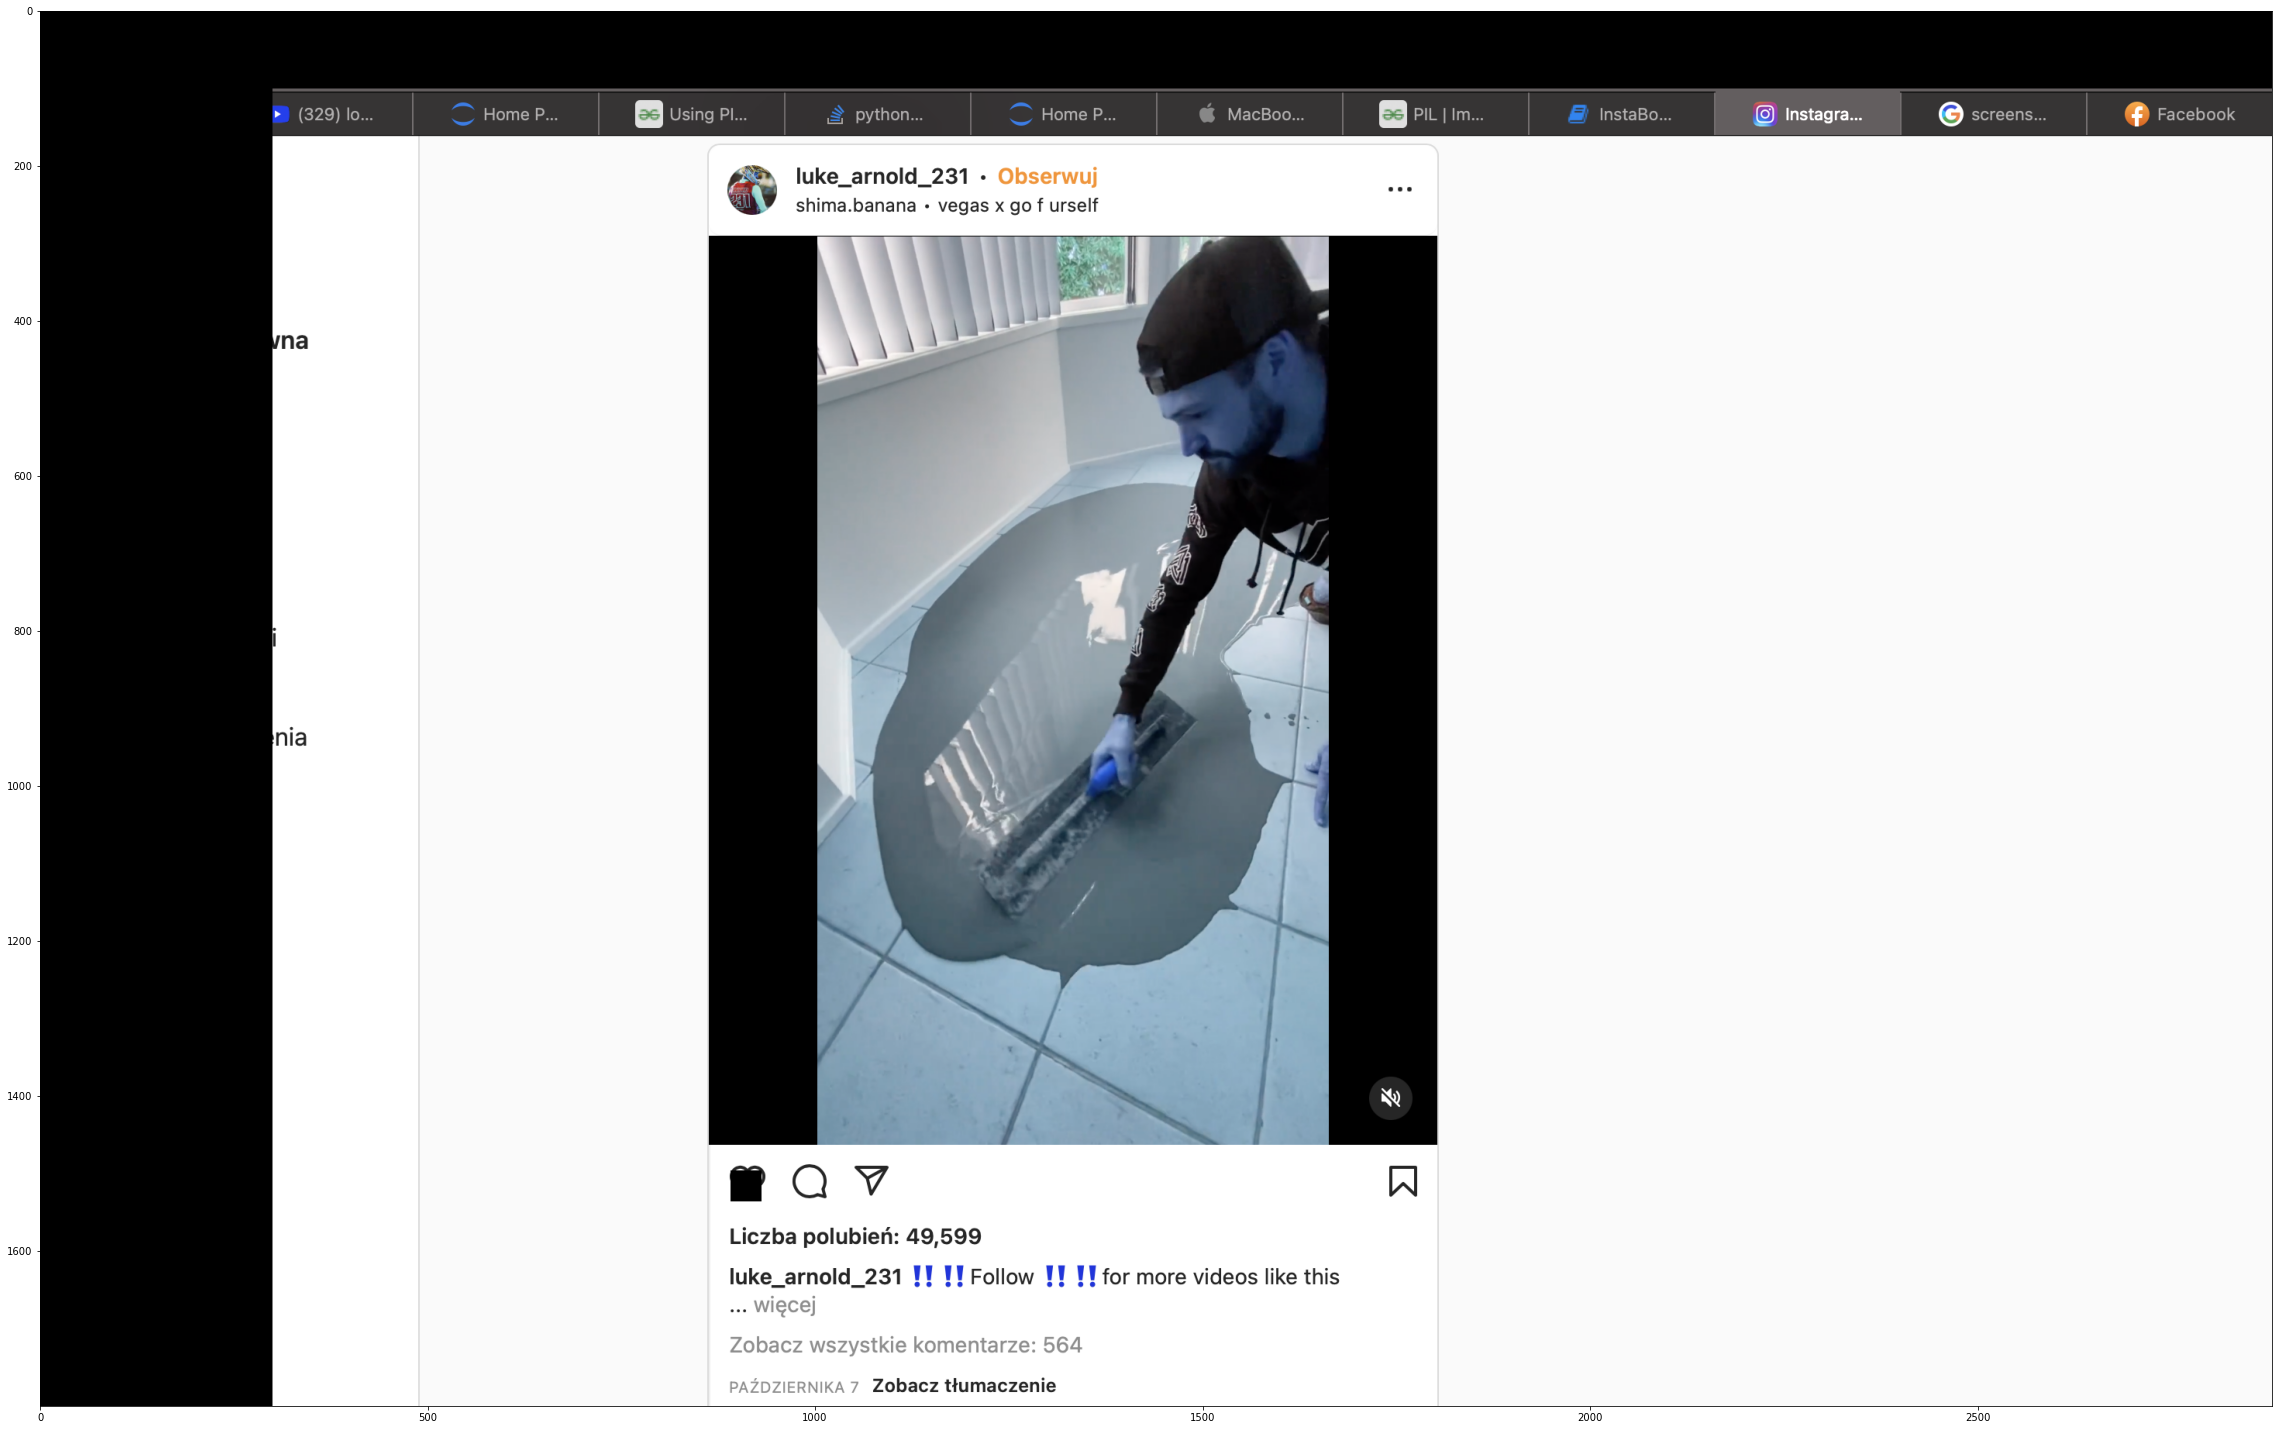

In [53]:
plt.figure(figsize=(40,40))
copy[:,:300] = 0
plt.imshow(copy)

In [10]:
full = Image.open("dataset/full1.png")
like = Image.open("dataset/like.png")
subscribe = Image.open("dataset/subscribe.png")

def getLoc(image, templ):
    img_rgb = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR) #cv2.imread('mario.png')
    template = cv2.cvtColor(np.array(templ), cv2.COLOR_RGB2BGR) #cv2.imread('mario_coin.png')
    w, h = template.shape[:-1]

    res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)
    threshold = .8
    loc = np.where(res >= threshold)
    return loc,w,h
loc, w, h = getLoc(full, like)

In [3]:
def getGroups(index, loc):
    groups = []
    x0 = loc[index][0]
    localgroup = [x0]
    for i in range(1, loc[index].size):
        if np.abs(loc[index][i]-x0) < 10:
            loc2algroup.append(loc[index][i])
        else:
            x0 = loc[index][i]
            groups.append(int(np.array(localgroup).mean()))
            localgroup = []
    groups.append(int(np.array(localgroup).mean()))
    return groups

In [4]:
def getPoints(loc,w,h):
    points = []
    X = getGroups(0, loc)
    Y = getGroups(1, loc)
    for x,y in zip(X,Y):
        points.append(((2*x+h)//2,(2*y+w)//2))
    return points
points = getPoints(loc,w,h)

NameError: name 'loc' is not defined

In [ ]:
point = points[1]
copy = full.copy()
copy = cv2.cvtColor(np.array(copy), cv2.COLOR_RGB2BGR)
plt.figure(figsize=(40,40))
plt.imshow(copy)

In [ ]:
for i in range(point[0] - 20, point[0] + 20):
    for j in range(point[1] - 20, point[1] + 20):
        copy[i,j] = 0
plt.figure(figsize = (40,40))
plt.imshow(copy)

In [16]:
point

(1516, 911)

In [ ]:
like = Image.open("dataset/like.png")


In [ ]:
import time
import threading
import pyautogui
from pynput.keyboard import Listener, KeyCode
 
delay = 0.5
start_stop_key = KeyCode(char='s')
exit_key = KeyCode(char='e')
 
 
class ClickMouse(threading.Thread):
    def __init__(self, delay):
        super(ClickMouse, self).__init__()
        self.delay = delay
        self.running = False
        self.program_run = True
 
    def start_clicking(self):
        print("start clicking")
        self.running = True
 
    def stop_clicking(self):
        self.running = False
 
    def exit(self):
        self.stop_clicking()
        self.program_run = False
 
    def run(self):
        while self.program_run:
            while self.running:
                print("XD2")
                #od lewej, od gory
                img = cv2.cvtColor(np.array(ImageGrab.grab(bbox =(0, 0, 2880, 1800))), cv2.COLOR_RGB2BGR)
                img[:,:300] = 0
                loc, w, h = getLoc(img, like)
                if loc[0].size:
                    points = getPoints(loc, w, h)
                    if points:
                        point = points[0]
                        pyautogui.moveTo(point[1]//2, point[0]//2)
                        pyautogui.click()
                        print("scroll")
                    points = []
                    loc = (np.array([]), np.array([]))
                time.sleep(1)
                pyautogui.scroll(-10)
                
                time.sleep(self.delay)
            time.sleep(0.5)
 
 
thread = ClickMouse(delay)
thread.start()
 
 
def on_press(key):
    if key == start_stop_key:
        if thread.running:
            thread.stop_clicking()
        else:
            thread.start_clicking()
    elif key == exit_key:
        thread.exit()
        listener.stop()
with Listener(on_press=on_press) as listener:
    listener.join()
    

In [ ]:
img = cv2.cvtColor(np.array(ImageGrab.grab(bbox =(0, 0, 2880, 1800))), cv2.COLOR_RGB2BGR)
img[:,:300] = 0

In [ ]:
plt.imshow(img)prs

In [64]:
img = cv2.cvtColor(np.array(ImageGrab.grab(bbox =(0, 0, 2880, 1800))), cv2.COLOR_RGB2BGR)
img[:,:300] = 0
loc, w, h = getLoc(img, like)

In [71]:
if loc[0].size:
    print("XD")

AttributeError: 'tuple' object has no attribute 'size'